C:\Users\Thibaut Joncour\AppData\Local\Temp\ipykernel_23072\3118896856.py:17: UserWarning: DelftStack
  warnings.warn('DelftStack')


No Warning Shown
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
États cachés prédits pour les données de test : 1174


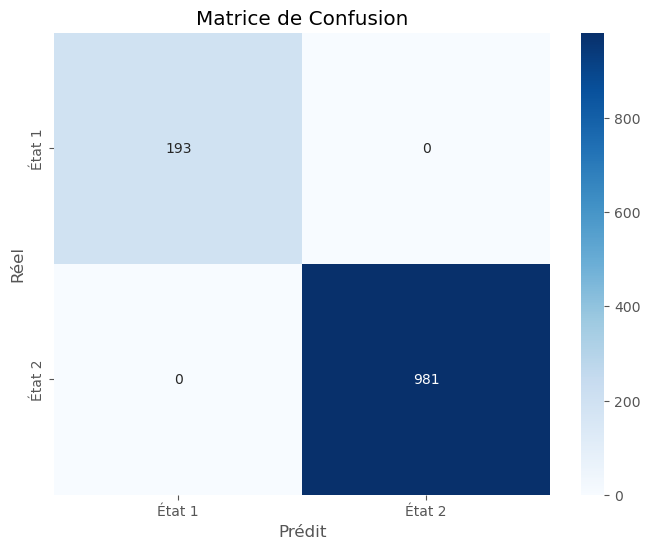

In [1]:
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Supposez que 'df1' est votre DataFrame avec la colonne 'binary_correlation'
# Assurez-vous d'ajuster le nom de la colonne en fonction de votre DataFrame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore', '.*do not.*' )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")
plt.style.use('ggplot')



# Scrapping on Yahoo Finance
def data(x):
    df =yf.download(tickers=x,   period='300mo', interval='1d')

    
    df = df['Close']
    df = df[:]
    
    return df


df = yf.download(tickers='ES=F',  period='300mo', interval='1d')
df = df.iloc[:,3:4]
liste = ['BTC-USD']
col = ['SP500','BTC']
for i in liste:
    df[i] = data(i)
df.columns = col
np.shape(df)

df = df.fillna(method='ffill')
# Calcul des rendements 
df1 = df.pct_change()*100

# Rolling covariance 

df1['cov BTC/SPX'] = df1['BTC'].rolling(32).cov(df1['SP500'])

# Rolling Corrélation

df1['corr BTC/SPX'] = df1['BTC'].rolling(32).corr(df1['SP500'])

# Rolling Variance of BTC
df1['variance BTC'] = df1['SP500'].rolling(32).var()

# Rolling Beta

df1['beta'] = df1['cov BTC/SPX']/df1['variance BTC']
df1


df1['binary_correlation'] = (df1['corr BTC/SPX'] > 0).astype(int)


# Extraire la séquence de corrélation
correlation_sequence = df1['binary_correlation'].values



# Diviser les données en parties d'entraînement et de test
train_data, test_data = train_test_split(correlation_sequence, test_size=0.2, shuffle=False, random_state=42)

# Créer et entraîner le modèle HMM avec les données d'entraînement
model = hmm.GaussianHMM(n_components=2, covariance_type="full")
model.fit(train_data.reshape(-1, 1))

# Prédire les états cachés sur les données de test
hidden_states_test = model.predict(test_data.reshape(-1, 1))

# Afficher les états cachés prédits pour les données de test
print("États cachés prédits pour les données de test :", len(hidden_states_test))
conf_matrix = confusion_matrix(test_data, hidden_states_test)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['État 1', 'État 2'], yticklabels=['État 1', 'État 2'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()